# Load FIRE Data

In [2]:
# Import the main analysis module
import gizmo_analysis as gizmo

In [3]:
# Choose the simulation directory
simulation_directory = '/Volumes/Haven/m12i_res7100'

In [4]:
# read star particles and gas cells at z = 0
# use particle_subsample_factor to periodically sub-sample particles, to save memory
part = gizmo.io.Read.read_snapshots(['star', 'gas' ], 'redshift', 0, simulation_directory, particle_subsample_factor=10)


# in utilities.simulation.Snapshot():
* reading:  Volumes/Haven/m12i_res7100/snapshot_times.txt

* input redshift = 0:  using snapshot index = 600, redshift = 0.000


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  Volumes/Haven/m12i_res7100/output/snapdir_600/snapshot_600.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 70514272 particles
    dark2     (id = 2): 5513331 particles
    gas       (id = 0): 57060074 particles
    star      (id = 4): 13976485 particles
    blackhole (id = 5): 0 particles

* reading the following
  species: ['star', 'gas']

* reading particles from:
    snapshot_600.0.hdf5
    snapshot_600.1.hdf5
    snapshot_600.2.hdf5
    snapshot_600.3.hdf5

! cannot find MUSIC config file:  Volumes/Haven/m12i_res7100/*/*.conf
! missing cosmological parameters, assuming the following (from AGORA):
  assuming omega_baryon = 0.0455
  assuming sigma_8 = 0.807
  assuming n_s = 0.961

* periodically subsampling all particles 

# Sample Image

In [5]:
# Import matplotlib and numpy libraries
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [6]:
# These are coordinates relative to the central galaxy
coordinates = part['gas'].prop( 'host.distance' )

# This is distance to the center of the central galaxy
distance_to_center = part['gas'].prop( 'host.distance.total' )

# An approximate definition for being in the galaxy: particles within 10 kpc of the center
is_in_galaxy = distance_to_center < 10.

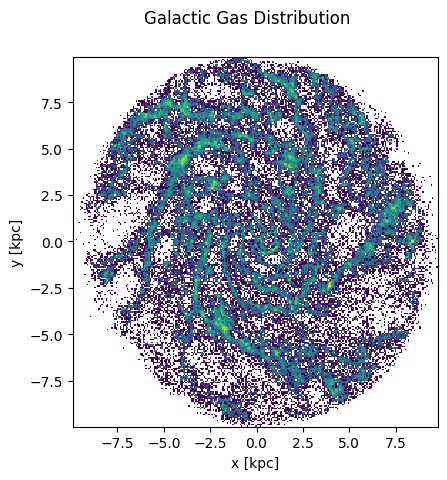

In [7]:
# Plot the logarithmically normalized count of the gas particles at each coordinate
fig = plt.figure()
ax = plt.gca()

# Use 2-D histogram
ax.hist2d(
    coordinates[:,0][is_in_galaxy],
    coordinates[:,1][is_in_galaxy],
    bins = 256,
    norm = matplotlib.colors.LogNorm(),
)

# Add labels, aspect ration, and title
ax.set_xlabel( r'x [kpc]' )
ax.set_ylabel( r'y [kpc]' )
ax.set_aspect( 'equal' )
fig.suptitle("Galactic Gas Distribution");

# Ananke

In [14]:
# Create p dictionary to store particle data
p = {}
p['pos3'] = part['star'].prop('host.distance')       # position in kpc
p['vel3'] = part['star'].prop('host.velocity')       # velocity in km/s
p['mass'] = part['star']['mass']                     # mass in solar masses
p['age'] = part['star'].prop('age')                  # log age in Gyr
p['feh'] = part['star'].prop('metallicity.fe')       # [Fe/H]
p['helium'] = part['star'].prop('metallicity.he')    # [He/H]
p['carbon'] = part['star'].prop('metallicity.c')     # [C/H]
p['nitrogen'] = part['star'].prop('metallicity.n')   # [N/H]
p['neon'] = part['star'].prop('metallicity.ne')      # [Ne/H]
p['magnesium'] = part['star'].prop('metallicity.mg') # [Mg/H]
p['silicon'] = part['star'].prop('metallicity.si')   # [Si/H]
p['sulphur'] = part['star'].prop('metallicity.s')    # [S/H]
p['calcium'] = part['star'].prop('metallicity.ca')   # [Ca/H]
p['oxygen'] = part['star'].prop('metallicity.o')     # [O/H]
p['alpha'] = part['star'].prop('metallicity.mg - metallicity.fe')          # [Mg/Fe]
p['parentid'] = part['star']['id']                   # indices of parent particles in snapshot
p['dform'] = np.zeros(part['star']['position'].shape[0], dtype='float32')  # dummy variable for now

In [ ]:
import ananke as an

# Run the ananke process with kword args
name='sim'
ananke = an.Ananke(p, name, fsample=0.01, photo_sys='padova/LSST', cmd_magnames='rmag,gmag-rmag'
                                            , app_mag_lim_lo=20, app_mag_lim_hi=24, abs_mag_lim_lo=-7.0, abs_mag_lim_hi=10.0
                                            , color_lim_lo=-1000, color_lim_hi=1000, surveyArea=360, r_max=1000
                                            , longitude=90, latitude=0)
ananke.run()

# Survey

In [16]:
# Make a survey using LSST (outputted as vaex data structure)
survey = ananke._output
survey._vaex

#,age,alpha,dec,dmod,feh,glat,glon,grav,lsst_gmag,lsst_imag,lsst_rmag,lsst_umag,lsst_ymag,lsst_zmag,lum,mact,mtip,parentid,partid,px,py,pz,ra,rad,smass,teff
0,4.658994674682617,0.2609992027282715,-45.01822,14.594936651523888,-0.022911779582500458,-25.967415,353.5505,3.861459,10.627215,7.7756534,9.373888,13.262571,6.6703877,7.040694,-1.0073777,0.32336727,2.4948993,58828888,1,7.413284459138437,-0.8380180261176029,-3.633476441327332,293.42264,8.298265585884934,0.32306311156119216,3.488609
1,4.658994674682617,0.2609992027282715,-44.191887,14.634140543052585,-0.022911779582500458,-28.523733,355.12744,3.9577756,8.662219,6.4331613,7.424396,11.420172,5.7345533,5.952422,-0.62860817,0.56379384,2.4948993,58828888,0,7.397016525268555,-0.6305801272392273,-4.034800052642822,297.35013,8.449443545984057,0.5638272470275852,3.5469363
2,4.658994674682617,0.2609992027282715,-48.056656,14.6629302638091,-0.022911779582500458,-29.295452,350.7999,3.889458,10.007037,7.349338,8.764639,12.6863985,6.3674703,6.688808,-0.8875182,0.3891686,2.4948993,58828888,1,7.371118727467358,-1.193875196841001,-4.1896026920686085,297.47974,8.562213498707019,0.38915847652480406,3.5056098
3,4.658994674682617,0.2609992027282715,-41.920433,14.670082162595167,-0.022911779582500458,-29.656992,358.03445,3.9710639,8.433106,6.2753615,7.197106,11.205107,5.6225533,5.824553,-0.58280843,0.60012776,2.4948993,58828888,1,7.460745950016403,-0.2560413214670445,-4.250614072346588,299.5478,8.590460248497491,0.6001394976785115,3.555032
4,4.658994674682617,0.2609992027282715,-44.97041,14.707345872509006,-0.022911779582500458,-27.723223,354.0421,3.998649,8.011848,5.9591727,6.798626,10.7573185,5.3648744,5.5525236,-0.47874188,0.6824403,2.4948993,58828888,1,7.6941547010991265,-0.8029721326766033,-4.065458788254473,295.981,8.739149613623544,0.6824958527105516,3.5740697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"20,354,824",9.589917182922363,0.2891618013381958,-34.176617,19.043499894416808,-1.9982283115386963,-31.191074,238.25137,4.3806024,3.4058316,3.4950228,3.4120262,4.287227,3.6248207,3.5878208,0.57258904,1.0107969,1.1485989,22809134,0,-28.975908279418945,-46.8271369934082,-33.33807373046875,82.03584,64.37244115050235,1.01104623608839,3.8897781
"20,354,825",9.589917182922363,0.2891618013381958,-51.508648,19.225680151634315,-1.9982283115386963,-38.10256,258.64386,4.4168043,3.8669765,3.8339012,3.79903,4.680861,3.9364212,3.8994212,0.41245824,0.9620401,1.1485989,22809134,1,-10.847230036755466,-54.00985354320421,-43.198734470526354,74.845436,70.0061235827531,0.9629610810059458,3.8640525
"20,354,826",9.589917182922363,0.2891618013381958,-48.938755,18.724219790368142,-1.9982283115386963,-26.688625,256.61594,4.5494394,4.95037,4.6997347,4.7469788,5.679321,4.7345395,4.7136045,0.025779115,0.83559304,1.1485989,22809134,1,-11.492815492590346,-48.30154498628574,-24.95899615489268,92.47988,55.570455685272705,0.8356699721000799,3.8158584
"20,354,827",8.461484909057617,0.3505781888961792,-33.291893,21.44851033060055,-0.44627296924591064,7.7738876,256.7541,4.2942095,1.0879472,1.6288426,1.3738775,1.766331,1.8647729,1.8003253,1.5872327,2.2126455,3.2195265,38049226,0,-44.23584747314453,-187.9237823486328,26.356287002563477,134.07567,194.8507429763744,2.2137668674971622,4.036554


# Graph Survey Data (Work In Progress)

In [22]:
# Import libraries for plotting 
import vaex
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [23]:
# Store survey vaex table in variable df
df = survey._vaex
type(df)

vaex.dataframe.DataFrameLocal

In [24]:
# Get the names of all columns in the survey
column_names = df.get_column_names()
print(column_names)

['age', 'alpha', 'dec', 'dmod', 'feh', 'glat', 'glon', 'grav', 'lsst_gmag', 'lsst_imag', 'lsst_rmag', 'lsst_umag', 'lsst_ymag', 'lsst_zmag', 'lum', 'mact', 'mtip', 'parentid', 'partid', 'px', 'py', 'pz', 'ra', 'rad', 'smass', 'teff']


In [25]:
# Create an array of descriptions for each graph (descriptions[i] for graph i)
descriptions = [
    "Age, log (age/yr)",
    "Alpha abundance, [alpha/Fe]",
    "Declination, degree",
    "Dmod",
    "Metallicity, [Fe/H]",
    "Galacitic latitude, degree",
    "Galacitic longitude, degree",
    "Surface gravity, log(gravity)",
    "Gmag",
    "Imag",
    "Rmag",
    "Umag",
    "Ymag",
    "Zmag",
    "Lum",
    "Actual solar mass, M_solar",
    "Mass at the giant branch tip, M_solar",
    "      Parent particle #",
    "0 if at parent coords, else 1",
    "Position x, heliocentric, kpc",
    "Position y, heliocentric, kpc",
    "Position z, heliocentric, kpc",
    "Right Ascension, degree",
    "Radial distance, kpc",
    "Initial stellar mass, M_solar",
    "Effective Temperature, log(T/Kelvin)",
]

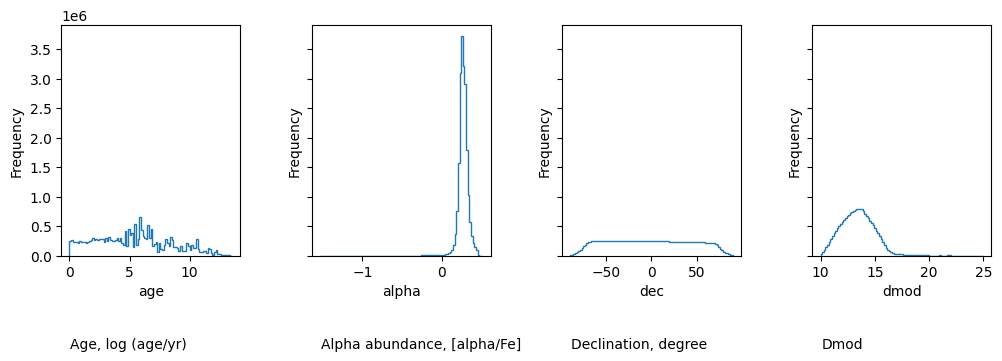

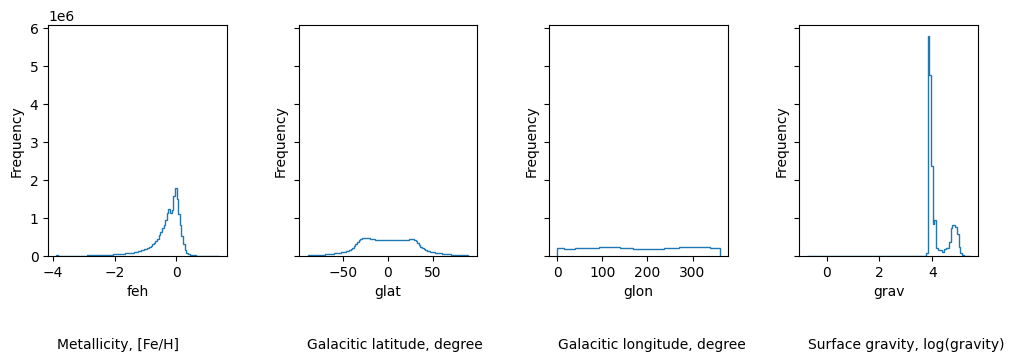

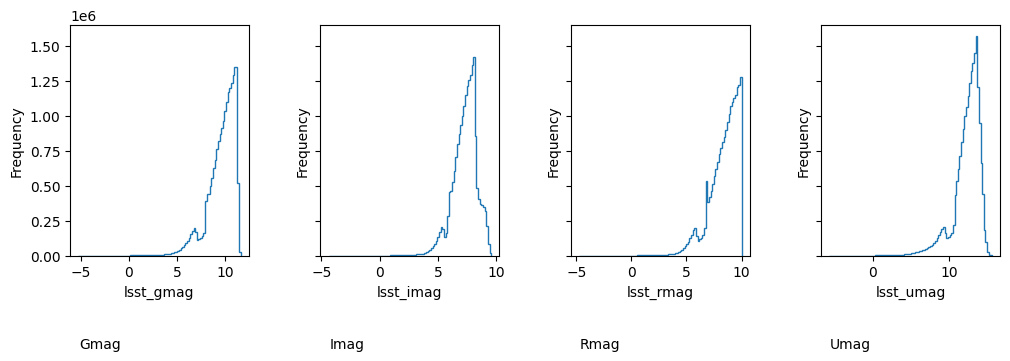

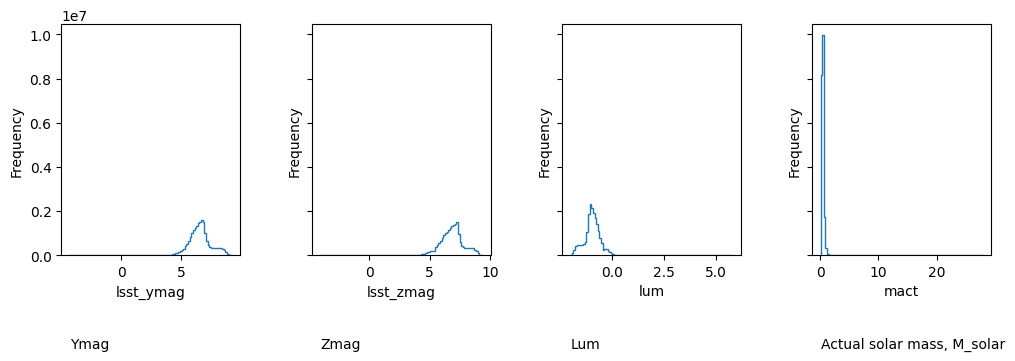

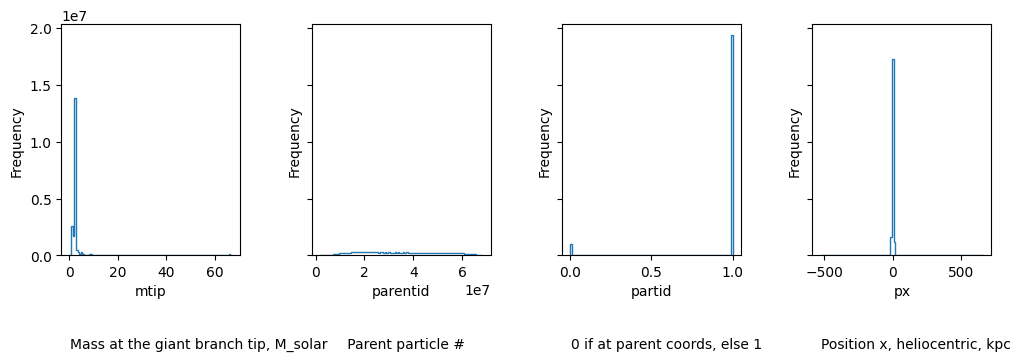

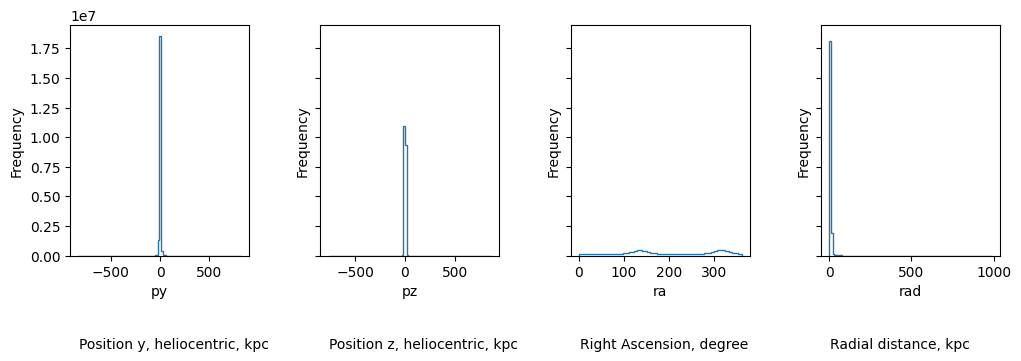

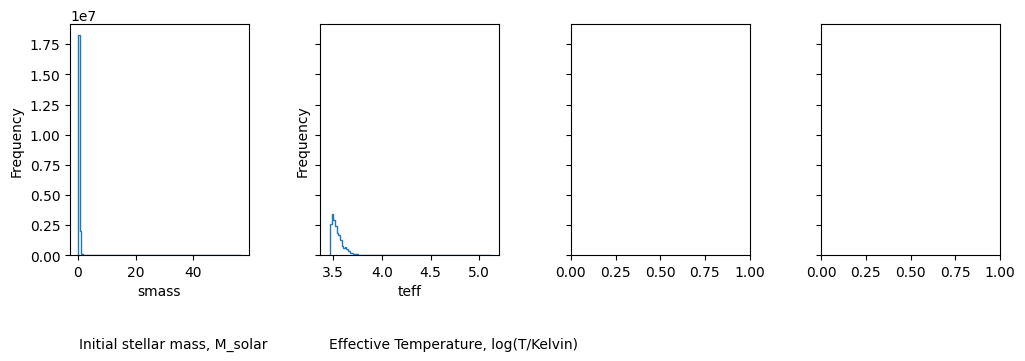

In [26]:
# Declare the number of graphs to plot based on the number of columns in the survey
n_cols = len(column_names)

# Declare how many graphs to plot in each subplot
n_subplots = 4  

# Loop over the columns and create a histogram for each one
for i, col in enumerate(column_names):
    # Check if a new subplot must be created
    if i % n_subplots == 0:
        # Create a new subplot 
        fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 3), sharey=True)
        # Increase width between plots in subplots
        plt.subplots_adjust(wspace=0.4)
    
    # Calculate the current placement of the plot in the subplot
    col_index = i % n_subplots
    
    # Create histogram 
    axes[col_index].hist(df[col].values, bins = 100, histtype='step')
    
    # Add lablels
    axes[col_index].set_xlabel(col)
    axes[col_index].set_ylabel("Frequency")
    
    # Add descriptions
    if i < len(descriptions):
        axes[col_index].text(0.05, -0.4, descriptions[i], transform=axes[col_index].transAxes)
    else:
        axes[col_index].text(0.05, -0.4, 'No description available', transform=axes[col_index].transAxes)
    
    
    # Unify y axis since they're all on the same scale (share y in matplot lib)
    # Change binning 
    # Use step histogram to hide color fill
    # Try to combine plots (by same units)

In [27]:
# Plot Magnitudes

/opt/anaconda3/envs/ananke_env/lib/python3.10/site-packages/vaex/viz/mpl.py:315: UserWarning: `plot` is deprecated and it will be removed in version 5.x. Please `df.viz.heatmap` instead.
  warnings.warn('`plot` is deprecated and it will be removed in version 5.x. Please `df.viz.heatmap` instead.')


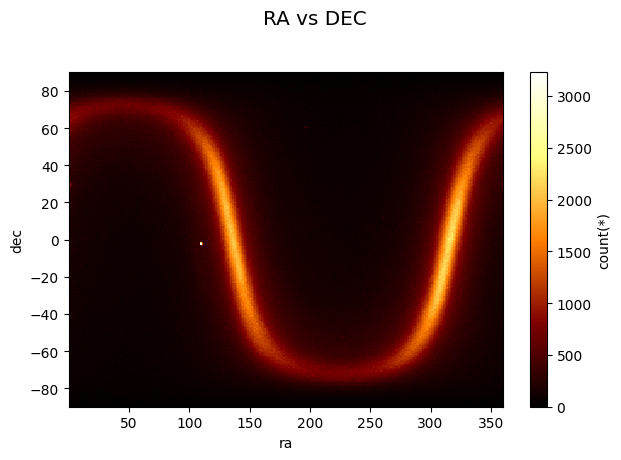

In [28]:
# Plot RA vs DEC
df.plot(x='ra', y='dec', title='RA vs DEC')
plt.show()

# Find how to plot Ra with astropy
# Activate grid 

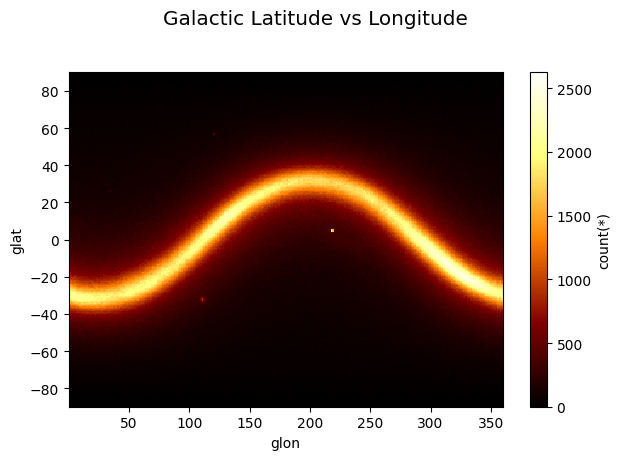

In [33]:
# Plot Galactic Latitude vs Longitude
df.plot(x='glon', y='glat', title='Galactic Latitude vs Longitude')
plt.show()

# Plot lon from -180 to 180
# Combine the lats/long with ra dec since they're on the same scale

In [34]:
# Plot Heliocentric Position from px py pz
#x = df['px'].values
#y = df['py'].values
#z = df['pz'].values

# Create a 3D plot
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(x, y, z)
#ax.set_xlabel('X (kpc)')
#ax.set_ylabel('Y (kpc)')
#ax.set_zlabel('X (kpc)')
#ax.set_title('Heliocentric Position')
# Add origin
#ax.scatter([0], [0], [0], color='red', s=100)
#plt.show()

# Find how to interact
# Optimize for time